# Neural Network From scratch
**Objective:**
To build a Neural network using numpy array, applying concepts learned from the course: Calculus for Data Science and Machine Learning by DeepLearining.AI


## Importing Required Libraries
1. Pandas:  read data, visualise data
2. numpy:  matrix computation, mathematical expressions
3. matplotlib: visualise data
4. sklearn.model_selection.train_test_split: split data for training and validating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
print('Setup Completed')

Setup Completed


## Data Collection & Pre-processing
1. Reading data using pandas
2. Walking through data
3. Dropping categorical data and working only on numerical data
4. Splitting inputs and output
5. separating 500 data for testing

In [2]:
Data= pd.read_csv('train.csv')

In [3]:
Data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
Data=Data.drop(['workclass', 'fnlwgt','education','occupation','marital-status','race','relationship','gender','native-country'], axis=1)

In [5]:
Data.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,16,99999,0,60,1
1,17,8,0,0,15,0
2,31,13,0,0,40,1
3,58,4,0,0,40,0
4,25,10,0,0,40,0


In [6]:
Data.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K'],
      dtype='object')

In [7]:
inputs=np.array(Data.drop(['income_>50K'],axis=1)).astype('float64').T
outputs=np.array(Data['income_>50K'])
inputs = (inputs - np.mean(inputs, axis=1, keepdims=True)) / np.std(inputs, axis=1, keepdims=True)

In [8]:
Data.isnull().sum()

age                0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
income_>50K        0
dtype: int64

In [9]:
Data.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
0,67,16,99999,0,60,1
1,17,8,0,0,15,0
2,31,13,0,0,40,1
3,58,4,0,0,40,0
4,25,10,0,0,40,0


In [10]:
outputs=outputs.reshape(1,len(outputs))
print(inputs.shape,outputs.shape)

(5, 43957) (1, 43957)


In [11]:

remaining_columns = 500  

# Create the two arrays
inputs_test = inputs[:, :remaining_columns]
inputs = inputs[:, remaining_columns:]
# Create the two arrays
outputs_test = outputs[:, :remaining_columns]
outputs = outputs[:, remaining_columns:]

In [12]:
print(inputs.shape,outputs.shape)

(5, 43457) (1, 43457)


## Creating Model


**Layer Size** 
 : hidden layer size can be changed changing value of n_h

In [13]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 2
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [14]:
(n_x, n_h, n_y) = layer_sizes(inputs, outputs)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 2
The size of the output layer is: n_y = 1


**Initializing Parameters** 
1. Weights and biases are the parameters
2. parameters are taken at random using numpy.random

In [15]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.rand(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))*0.01
    W2 = np.random.rand(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))*0.01
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [16]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[1.98507064e-03 6.98828424e-03 4.11255804e-03 3.88172354e-03
  5.58902342e-03]
 [7.12776488e-03 4.03482050e-05 1.87606571e-03 7.50872183e-03
  1.92065845e-03]]
b1 = [[0.]
 [0.]]
W2 = [[0.00683987 0.00883033]]
b2 = [[0.]]


**Activation Function**
1. Sigmoid is used as an activation function
2. To get output in the range of 0 to 1
3. Has easier derivative

In [17]:
sigmoid= lambda z: 1/(1+np.exp(-z))

**Forward Propagation**
1. Input values passes through weights and activation function to give result
2. provides probability on basis of parameters and input

In [18]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.matmul(W1,X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [19]:
A2, cache = forward_propagation(inputs, parameters)

print(A2[0][:5])

[0.50196364 0.50196332 0.50197978 0.50196361 0.50194725]


**Loss Function**
1. Log Loss is used, commonly used for classification problem
2. Computed so that we can reduce loss by equating first derivative of log loss to zero.(Concept of minima)

In [20]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logloss = -np.multiply(Y,np.log(A2))-np.multiply(1-Y,np.log(1-A2))
    cost = (1/m )*(np.sum(logloss))

    assert(isinstance(cost, float))
    
    return cost

**Backward Propagation & Updating weight**
1. Using gradient descent to update weight
2. To know by howmuch weights should be updated, backpropagation is helpful

In [21]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, inputs, outputs)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-0.00016879 -0.00024339 -0.00016262 -0.00010577 -0.00016567]
 [-0.00021792 -0.00031424 -0.00021002 -0.00013655 -0.0002139 ]]
db1 = [[0.00044918]
 [0.0005799 ]]
dW2 = [[0.13075297 0.13095926]]
db2 = [[0.26268775]]


In [22]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [23]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[0.00218762 0.00728035 0.00430771 0.00400865 0.00578783]
 [0.00738927 0.00041743 0.00212809 0.00767258 0.00217734]]
b1 updated = [[-0.00053902]
 [-0.00069588]]
W2 updated = [[-0.1500637  -0.14832079]]
b2 updated = [[-0.3152253]]


**Combining all**
1. training_loss and validation_loss are calculated after each epoch to know behavior of the network
2. Dataset is shuffled after each epoch


In [24]:
def nn_model(X, Y, n_h, epochs=500, batch_size=32,learning_rate=1.2, print_cost=False):
    def shuffle_dataset(X, y):
        permutation = np.random.permutation(X.shape[1])
        return (X[:,permutation], y[:,permutation])
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    Cost_loss=[]
    Validation_loss=[]
    
    for epoch in range(epochs):
        X,Y=shuffle_dataset(X, Y)
        X_train, X_val, y_train, y_val = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
        X_train = X_train.T
        X_val = X_val.T
        y_train = y_train.T
        y_val = y_val.T
        for batch_start in range(0, len(X_train), batch_size):
            batch_end = batch_start + batch_size
            X_batch = X_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end] 
            
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            A2, cache = forward_propagation(X, parameters)
            
            # Cost function. Inputs: "A2, Y". Outputs: "cost".
            cost = compute_cost(A2, Y)
            
            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            grads = backward_propagation(parameters, cache, X, Y)
            
            # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
            parameters = update_parameters(parameters, grads)
                # Print the cost every iteration.
            #if print_cost:
                #Cost_loss.append(cost)
                #print ("Cost after iteration %i: %f" %(i, cost))
    
            # Compute training cost at the end of the epoch
        train_predictions, _ = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_predictions, y_train)
        Cost_loss.append(train_cost)
        # Compute validation loss at the end of the epoch
        val_predictions, _ = forward_propagation(X_val, parameters)
        val_loss = compute_cost(val_predictions, y_val)
        Validation_loss.append(val_loss)
    return parameters,Cost_loss,Validation_loss

## Training Model

In [25]:
parameters,cost_loss,Validation_loss = nn_model(inputs, outputs, n_h=2, epochs=500, batch_size=60, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

W1 = [[-0.59978429 -0.55930399 -1.80225937 -0.17061776 -0.90883873]
 [-0.34980352 -0.69035636 -1.87473092 -0.24142604 -0.04275123]]
b1 = [[-0.20427075]
 [ 0.17222835]]
W2 = [[-3.11799138 -3.0873088 ]]
b2 = [[1.74616671]]


## Testing and observing model

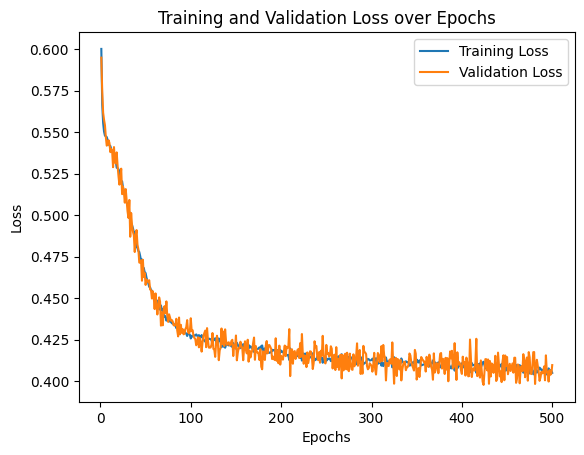

In [26]:
def plot_loss(Cost_loss, Validation_loss):
    epochs = len(Cost_loss)
    plt.plot(range(1, epochs + 1), Cost_loss, label='Training Loss')
    plt.plot(range(1, epochs + 1), Validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss over Epochs')
    plt.show()
plot_loss(cost_loss, Validation_loss)


In [27]:
def predict(X, parameters):
    A2, cache =  forward_propagation(X, parameters)
    predictions = A2>0.5
    return predictions

In [28]:
inputs=np.array(Data.drop(['income_>50K'],axis=1)).astype('float64').T
inputs = (inputs - np.mean(inputs, axis=1, keepdims=True)) / np.std(inputs, axis=1, keepdims=True)

X_pred = np.array([list(inputs[0][43457:]),list(inputs[1][43457:]),list(inputs[2][43457:]),list(inputs[3][43457:]),list(inputs[4][43457:])])
Y_pred = predict(X_pred, parameters)
outputs=np.array(Data['income_>50K'])
outputs=outputs.reshape(1,len(outputs))

In [32]:
tp=0
tn=0
fp=0
fn=0
actual=list(outputs[0][43457:]==1)
pred=Y_pred[0]
for i in range(len(actual)):
    if actual[i]:
        if pred[i]:
            tp=tp+1
        else:
            fp=fp+1
    else:
        if pred[i]:
            fn=fn+1
        else:
            tn=tn+1
            


In [33]:
tp

47

In [34]:
tn

365

In [35]:
fp

62

In [36]:
fn

26

In [37]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print('Accuracy :',accuracy)

Accuracy : 0.824


In [38]:
Precision=tp/(tp+fp)
print('Precision: ',Precision)

Precision:  0.43119266055045874


In [39]:
Recall=tp/(tp+fn)
print('Recall: ',Recall)

Recall:  0.6438356164383562


In [40]:
print('F1 Score: ',2*Precision*Recall/(Precision+Recall))

F1 Score:  0.5164835164835165


## Saving Model Weights for future use in a JSON file

In [41]:
import json
for key, value in parameters.items():
    if isinstance(value, np.ndarray):
        parameters[key] = value.tolist()
file_path = 'parameters.json'
with open(file_path, 'w') as json_file:
    json.dump(parameters, json_file)

print(f'Dictionary saved to {file_path}')


Dictionary saved to parameters.json


In [42]:
inputs = (inputs - np.mean(inputs, axis=1, keepdims=True)) / np.std(inputs, axis=1, keepdims=True)

In [43]:
Data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000
